# The $\Delta h$ method
Minimal working example of the $\Delta h$ method of glacier geometry change presented in [Huss et al. (2010)](https://www.hydrol-earth-syst-sci.net/14/815/2010/hess-14-815-2010.pdf).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Normalized surface elevation change $\Delta h$ is calculated as a function of each bands elevation difference $h_n$ to the lowest band normalized with the glacier's total elevation range by
$$
    \Delta h = (h_n + a)^\gamma + b \cdot (h_n + a) + c,
$$
whereby the coefficient $a$, $b$, $c$ and $\gamma$ are specified for three different glacier size classes.

In [50]:
np.abs(np.diff([100,1500]))[0]

1400

In [67]:
def compute_delta_h(h_n, a=-0.05, b=0.19, c=0.01, gamma=4, glacier_size=None, normalize=False):
    """     
    """
    # normalize elevation h_n if necessary
    if normalize:
        h_n = h_n / np.abs(np.diff(normalize))[0] - 1
    
    # change parameters according to glacier size class
    if glacier_size == 'medium':
        a = -0.05
        b = 0.19
        c = 0.01
        gamma = 4
    elif glacier_size == 'large':
        a = -0.02
        b = 0.12
        c = 0
        gamma = 6
    elif glacier_size == 'small':
        a = -0.3
        b = 0.6
        c = 0.09
        gamma = 2
    
    return (h_n + a)**gamma + b*(h_n + a) + c

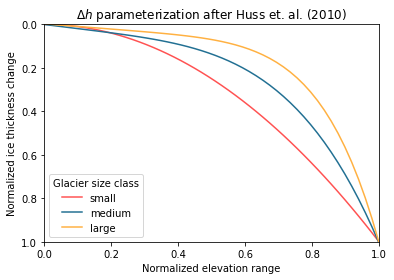

In [82]:
# define glacier elevation range
min_elev = 1500
max_elev = 3000
elevation_range = np.linspace(min_elev, max_elev)

import matplotlib as mpl
from cycler import cycler
new_colors = ['#ff5252', '#227093', '#ffb142', '#706fd3',]
mpl.rcParams['axes.prop_cycle'] = cycler(color=new_colors)

# compute normalized ice thickness change and plot
fig, ax = plt.subplots()
for size in ['small', 'medium', 'large']:
    delta_h = compute_delta_h(elevation_range, glacier_size=size, normalize=[min_elev, max_elev])
    ax.plot(elevation_range/np.abs(np.diff([min_elev, max_elev]))-1, delta_h, label=size)
ax.set_xlabel('Normalized elevation range')
ax.set_ylabel('Normalized ice thickness change')
ax.set_title('$\Delta h$ parameterization after Huss et. al. (2010)')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.invert_yaxis()
ax.legend(title='Glacier size class')


new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
mpl.rcParams['axes.prop_cycle'] = cycler(color=new_colors)